In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [3]:
df = pd.read_csv('Fraud_check.csv')

### EDA

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [7]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [9]:
df.rename(columns= {'Taxable.Income':'taxable_income'},inplace=True)

In [10]:
def classify(taxable_income):
    if taxable_income <= 30000:
        return "Risky"
    else:
        return "Good"

In [11]:
df['taxable_income'] = df['taxable_income'].apply(classify)

<AxesSubplot:xlabel='taxable_income', ylabel='count'>

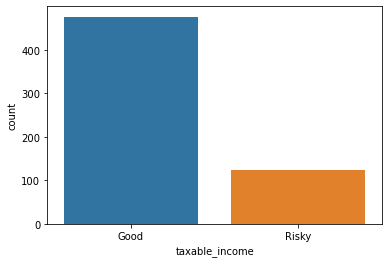

In [12]:
sns.countplot(x=df['taxable_income'])

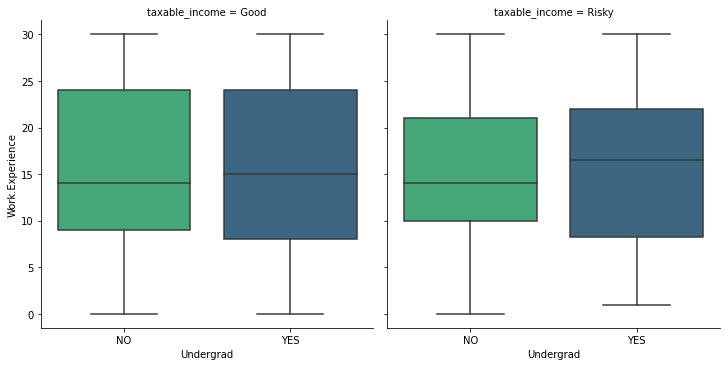

In [13]:
sns.catplot(x='Undergrad',y='Work.Experience',data=df,kind='box',col='taxable_income',palette='viridis_r')

### Feature Encoding

In [14]:
X = pd.get_dummies(data=df.drop('taxable_income',axis=1),drop_first=True)

In [15]:
y = df['taxable_income']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Decision Tree Model (build & validation)

In [17]:
accuracy = []
precision = []
recall = []
for d in range(1,50):
    model=DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred,pos_label='Good')
    pre = precision_score(y_test, y_pred,pos_label='Good')
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)

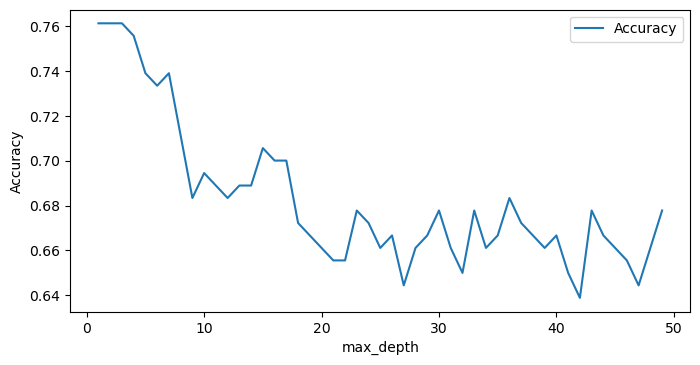

In [18]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(1,50),accuracy,label="Accuracy")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.show()

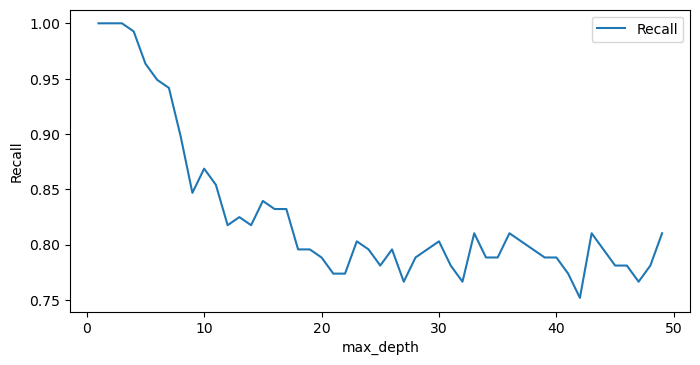

In [19]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(1,50),recall,label="Recall")
plt.legend()
plt.ylabel('Recall')
plt.xlabel('max_depth')
plt.show()

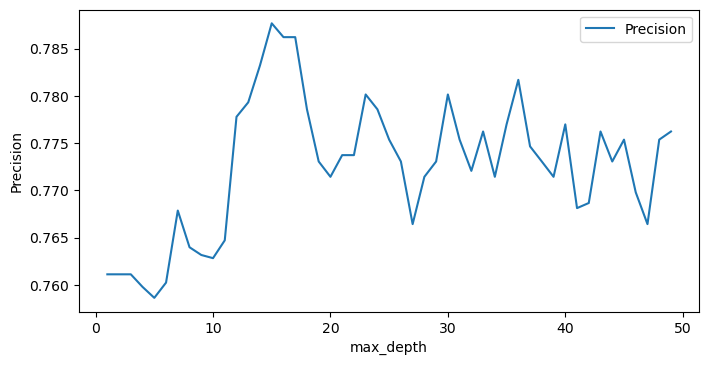

In [20]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(1,50),precision,label="Precision")
plt.legend()
plt.ylabel('Precision')
plt.xlabel('max_depth')
plt.show()

### Final model

In [21]:
# Best case senerio for our model is when max_depth is 17.
# As our data-set is unbalanced.

model=DecisionTreeClassifier(criterion='entropy',max_depth=17)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test, y_pred)
rec=recall_score(y_test, y_pred,pos_label='Good')
pre=precision_score(y_test, y_pred,pos_label='Good')

In [22]:
print(f'accuracy{acc},recall{rec},precision{pre}')

accuracy0.6888888888888889,recall0.8175182481751825,precision0.7832167832167832


In [23]:
pd.crosstab(y_test,y_pred)

col_0,Good,Risky
taxable_income,,
Good,112,25
Risky,31,12


### Predictions

In [24]:
confusion_matrix(y_test,y_pred)

array([[112,  25],
       [ 31,  12]], dtype=int64)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


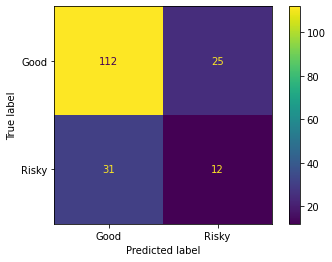

In [25]:
plot_confusion_matrix(model,X_test,y_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.82      0.80       137
       Risky       0.32      0.28      0.30        43

    accuracy                           0.69       180
   macro avg       0.55      0.55      0.55       180
weighted avg       0.67      0.69      0.68       180



In [27]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 17,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}